Un uso alternativo de los AE es el "pre-training" no supervisado de redes profundas, esto es hacer un AE que parta de una capa, vaya a si misma, y pase por la siguiente. Esto logra inicializar los pesos de la red de mejor forma.

Primero se hara una red clasica de 2 capas con funcion sigmoid con la que se comparara la pre-entrenada.

In [1]:
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense
from keras.optimizers import SGD, Adagrad
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt


NVAL=5000
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_val=x_train[:NVAL]
x_train=x_train[NVAL:]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Y_val=Y_train[:NVAL]
Y_train=Y_train[NVAL:]





Using TensorFlow backend.


In [5]:

model = Sequential()
model.add(Dense(1000, activation='sigmoid', input_shape=(784,)))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=SGD(lr=1.0), loss='categorical_crossentropy')
histog=model.fit(x_train, Y_train,nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('AE/Sigmoid/768x1000x1000x10-NFT-50epochs.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s - loss: 14.6519 - val_loss: 14.7190
Epoch 2/30
55000/55000 [==============================] - 4s - loss: 14.6566 - val_loss: 14.7190
Epoch 3/30
55000/55000 [==============================] - 4s - loss: 14.6566 - val_loss: 14.7190
Epoch 4/30
55000/55000 [==============================] 

Luego se entrena un AE para encontrar los pesos de la primera capa

In [6]:

input_img1 = Input(shape=(784,))
encoded1 = Dense(1000,activation='sigmoid')(input_img1)
decoded1 = Dense(784, activation='sigmoid')(encoded1)
autoencoder1 = Model(input=input_img1, output=decoded1)
encoder1 = Model(input=input_img1, output=encoded1)
autoencoder1.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='binary_crossentropy')
autoencoder1.fit(x_train, x_train, nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, x_val))
autoencoder1.save('AE/Sigmoid/autoencoder_layer1.h5')
encoder1.save('AE/Sigmoid/encoder_layer1.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
  700/55000 [..............................] - ETA: 7s - loss: 0.3199 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


55000/55000 [==============================] - 4s - loss: 0.1433 - val_loss: 0.1041
Epoch 2/30
55000/55000 [==============================] - 4s - loss: 0.0948 - val_loss: 0.0880
Epoch 3/30
55000/55000 [==============================] - 4s - loss: 0.0844 - val_loss: 0.0815
Epoch 4/30
55000/55000 [==============================] - 4s - loss: 0.0796 - val_loss: 0.0780
Epoch 5/30
55000/55000 [==============================] - 4s - loss: 0.0766 - val_loss: 0.0757
Epoch 6/30
55000/55000 [==============================] - 4s - loss: 0.0747 - val_loss: 0.0741
Epoch 7/30
55000/55000 [==============================] - 4s - loss: 0.0733 - val_loss: 0.0729
Epoch 8/30
55000/55000 [==============================] - 4s - loss: 0.0722 - val_loss: 0.0719
Epoch 9/30
55000/55000 [==============================] - 4s - loss: 0.0713 - val_loss: 0.0712
Epoch 10/30
55000/55000 [==============================] - 4s - loss: 0.0706 - val_loss: 0.0706
Epoch 11/30
55000/55000 [==============================] - 4

Otro AE para la segunda capa 

In [7]:
x_train_encoded1 = encoder1.predict(x_train)
x_val_encoded1 = encoder1.predict(x_val)
x_test_encoded1 = encoder1.predict(x_test)

input_img2 = Input(shape=(1000,))
encoded2 = Dense(1000, activation='sigmoid')(input_img2)
decoded2 = Dense(1000, activation='sigmoid')(encoded2)
autoencoder2 = Model(input=input_img2, output=decoded2)
encoder2 = Model(input=input_img2, output=encoded2)
autoencoder2.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='binary_crossentropy')
autoencoder2.fit(x_train_encoded1,x_train_encoded1,nb_epoch=30,batch_size=25,
shuffle=True, validation_data=(x_val_encoded1, x_val_encoded1))
autoencoder2.save('AE/Sigmoid/autoencoder_layer2.h5')
encoder2.save('AE/Sigmoid/encoder_layer2.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
   25/55000 [..............................] - ETA: 108s - loss: 0.7245

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


55000/55000 [==============================] - 4s - loss: 0.6266 - val_loss: 0.5973
Epoch 2/50
55000/55000 [==============================] - 4s - loss: 0.5894 - val_loss: 0.5843
Epoch 3/50
55000/55000 [==============================] - 4s - loss: 0.5817 - val_loss: 0.5799
Epoch 4/50
55000/55000 [==============================] - 4s - loss: 0.5787 - val_loss: 0.5779
Epoch 5/50
55000/55000 [==============================] - 4s - loss: 0.5771 - val_loss: 0.5767
Epoch 6/50
55000/55000 [==============================] - 4s - loss: 0.5762 - val_loss: 0.5760
Epoch 7/50
55000/55000 [==============================] - 4s - loss: 0.5756 - val_loss: 0.5754
Epoch 8/50
55000/55000 [==============================] - 4s - loss: 0.5751 - val_loss: 0.5751
Epoch 9/50
55000/55000 [==============================] - 4s - loss: 0.5748 - val_loss: 0.5748
Epoch 10/50
55000/55000 [==============================] - 4s - loss: 0.5745 - val_loss: 0.5746
Epoch 11/50
55000/55000 [==============================] - 4

Se hace el "fine tuning" de la red con los pesos obtenidos con los autoencoders, esto hace que la red "parta con ventaja". 

In [14]:
autoencoder1=load_model('AE/Sigmoid/autoencoder_layer1.h5')
autoencoder2=load_model('AE/Sigmoid/autoencoder_layer2.h5')


model = Sequential()
model.add(Dense(1000, activation='sigmoid', input_shape=(784,)))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Dense(1000, activation='sigmoid'))
model.layers[-1].set_weights(autoencoder2.layers[1].get_weights())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=SGD(lr=1.0),loss='categorical_crossentropy', metrics=['accuracy'])
histft=model.fit(x_train, Y_train,nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('AE/Sigmoid/768x1000x1000x10-finetunned.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 5s - loss: 0.3811 - acc: 0.9611 - val_loss: 0.3754 - val_acc: 0.9691
Epoch 2/50
55000/55000 [==============================] - 5s - loss: 0.3618 - acc: 0.9699 - val_loss: 0.3706 - val_acc: 0.9710
Epoch 3/50
55000/55000 [==============================] - 5s - loss: 0.3434 - acc: 0.9732 - v

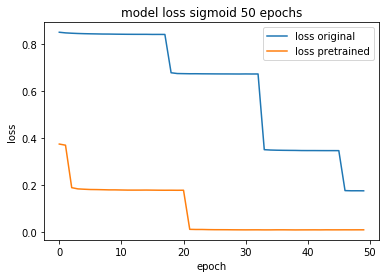

In [15]:
plt.plot(histog.history['val_loss'])
plt.plot(histft.history['val_loss'])
plt.title('model loss sigmoid 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss original', 'loss pretrained'], loc='upper right')
plt.show()


Se obtiene el resultado esperado, que la red pre-entrenada tenga mejores resultados antes, sin embargo, esta ventaja se pierde para una cantidad suficiente de epochs.

Se repetira la actividad anterior pero con funciones de activacion Tanh

In [16]:

model = Sequential()
model.add(Dense(1000, activation='tanh', input_shape=(784,)))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='Adagrad',loss='categorical_crossentropy')
histog=model.fit(x_train, Y_train,nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('AE/Tanh/768x1000x1000x10-NFT-50epochs.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_34 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_35 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s - loss: 2.0682 - val_loss: 0.1285
Epoch 2/30
55000/55000 [==============================] - 5s - loss: 0.1094 - val_loss: 0.0974
Epoch 3/30
55000/55000 [==============================] - 5s - loss: 0.0724 - val_loss: 0.0770
Epoch 4/30
55000/55000 [==============================] - 5s -

In [19]:

input_img1 = Input(shape=(784,))
encoded1 = Dense(1000,activation='tanh')(input_img1)
decoded1 = Dense(784, activation='tanh')(encoded1)
autoencoder1 = Model(input=input_img1, output=decoded1)
encoder1 = Model(input=input_img1, output=encoded1)
autoencoder1.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='categorical_crossentropy')
autoencoder1.fit(x_train, x_train, nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, x_val))
autoencoder1.save('AE/Tanh/autoencoder_layer1.h5')
encoder1.save('AE/Tanh/encoder_layer1.h5')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s - loss: 4.7814 - val_loss: 1.2171e-05
Epoch 2/30
55000/55000 [==============================] - 4s - loss: 1.2215e-05 - val_loss: 1.2171e-05
Epoch 3/30
55000/55000 [==============================] - 4s - loss: 1.2215e-05 - val_loss: 1.2171e-05
Epoch 4/30
55000/55000 [==============================] - 4s - loss: 1.2215e-05 - val_loss: 1.2171e-05
Epoch 5/30
55000/55000 [==============================] - 4s - loss: 1.2215e-05 - val_loss: 1.2171e-05
Epoch 6/30
55000/55000 [==============================] - 4s - loss: 1.2215e-05 - val_loss: 1.2171e-05
Epoch 7/30
55000/55000 [==============================] - 4s - loss: 1.2215e-05 - val_loss: 1.2171e-05
Epoch 8/30
55000/55000 [==============================] - 4s - loss: 1.2215e-05 - val_loss: 1.2171e-05
Epoch 9/30
55000/55000 [==============================] - 4s - loss: 1.2215e-05 - val_loss: 1.2171e-05
Epoch 10/30
55000/55000 [===

In [10]:
x_train_encoded1 = encoder1.predict(x_train)
x_val_encoded1 = encoder1.predict(x_val)
x_test_encoded1 = encoder1.predict(x_test)

input_img2 = Input(shape=(1000,))
encoded2 = Dense(1000, activation='tanh')(input_img2)
decoded2 = Dense(1000, activation='tanh')(encoded2)
autoencoder2 = Model(input=input_img2, output=decoded2)
encoder2 = Model(input=input_img2, output=encoded2)
autoencoder2.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='categorical_crossentropy')
autoencoder2.fit(x_train_encoded1,x_train_encoded1,nb_epoch=30,batch_size=25,
shuffle=True, validation_data=(x_val_encoded1, x_val_encoded1))
autoencoder2.save('AE/Tanh/autoencoder_layer2.h5')
encoder2.save('AE/Tanh/encoder_layer2.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
   25/55000 [..............................] - ETA: 141s - loss: 0.7900

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


55000/55000 [==============================] - 4s - loss: -5.2329 - val_loss: -5.2302
Epoch 2/30
55000/55000 [==============================] - 4s - loss: -5.2408 - val_loss: -5.2303
Epoch 3/30
55000/55000 [==============================] - 4s - loss: -5.2403 - val_loss: -5.2292
Epoch 4/30
55000/55000 [==============================] - 4s - loss: -5.2397 - val_loss: -5.2292
Epoch 5/30
55000/55000 [==============================] - 4s - loss: -5.2394 - val_loss: -5.2285
Epoch 6/30
55000/55000 [==============================] - 4s - loss: -5.2391 - val_loss: -5.2279
Epoch 7/30
55000/55000 [==============================] - 4s - loss: -5.2381 - val_loss: -5.2261
Epoch 8/30
55000/55000 [==============================] - 4s - loss: -5.2369 - val_loss: -5.2261
Epoch 9/30
55000/55000 [==============================] - 4s - loss: -5.2369 - val_loss: -5.2261
Epoch 10/30
55000/55000 [==============================] - 4s - loss: -5.2369 - val_loss: -5.2260
Epoch 11/30
55000/55000 [===============

In [17]:
autoencoder1=load_model('AE/Tanh/autoencoder_layer1.h5')
autoencoder2=load_model('AE/Tanh/autoencoder_layer2.h5')


model = Sequential()
model.add(Dense(1000, activation='tanh', input_shape=(784,)))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Dense(1000, activation='tanh'))
model.layers[-1].set_weights(autoencoder2.layers[1].get_weights())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='Adagrad',loss='categorical_crossentropy', metrics=['accuracy'])
histft=model.fit(x_train, Y_train,nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('AE/Sigmoid/768x1000x1000x10-finetunned.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_37 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_38 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s - loss: 6.6845 - acc: 0.5088 - val_loss: 6.2761 - val_acc: 0.5962
Epoch 2/30
55000/55000 [==============================] - 5s - loss: 6.4325 - acc: 0.5891 - val_loss: 6.2575 - val_acc: 0.6004
Epoch 3/30
55000/55000 [==============================] - 5s - loss: 6.4154 - acc: 0.5938 - v

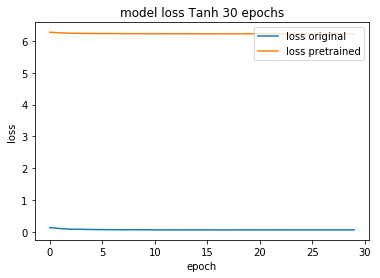

In [25]:
plt.plot(histog.history['val_loss'])
plt.plot(histft.history['val_loss'])
plt.title('model loss Tanh 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss original', 'loss pretrained'], loc='upper right')
plt.show()


La red con funcion de activacion Tanh preentrenada parte mejor que la inicializada con valores aleatorios, sin embargo, llega a un minimo local peor que la original. Se repitio el experimiento multiples veces y siempre se llegaba a un resultado del mismo tipo, puede que el azar sea la causa, ya que es extraño que por tan solo cambiar la funcion de activacion el preentrenamiento parta en un minimo local, en especial ya que la sigmoide es un tipo de Tanh.

Tambien se utilizo el optimizador Adagrad, ya que SGD no convergia nunca, e incluso partia peor.


Extrañamente el AE de la segunda capa empezo a arrojar error negativo.

Se repite lo anterior pero con ReLU.

In [26]:

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(784,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='Adagrad',loss='categorical_crossentropy')
histog=model.fit(x_train, Y_train,nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('AE/relu/768x1000x1000x10-NFT-50epochs.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_52 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_53 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s - loss: 0.1749 - val_loss: 0.0842
Epoch 2/30
55000/55000 [==============================] - 5s - loss: 0.0546 - val_loss: 0.0664
Epoch 3/30
55000/55000 [==============================] - 5s - loss: 0.0306 - val_loss: 0.0566
Epoch 4/30
55000/55000 [==============================] - 5s -

In [34]:

input_img1 = Input(shape=(784,))
encoded1 = Dense(1000,activation='relu')(input_img1)
decoded1 = Dense(784, activation='relu')(encoded1)
autoencoder1 = Model(input=input_img1, output=decoded1)
encoder1 = Model(input=input_img1, output=encoded1)
autoencoder1.compile(optimizer='Adadelta', loss='binary_crossentropy')
autoencoder1.fit(x_train, x_train, nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, x_val))
autoencoder1.save('AE/relu/autoencoder_layer1.h5')
encoder1.save('AE/relu/encoder_layer1.h5')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 6s - loss: 0.1621 - val_loss: 0.1210
Epoch 2/50
55000/55000 [==============================] - 6s - loss: 0.1156 - val_loss: 0.1121
Epoch 3/50
55000/55000 [==============================] - 6s - loss: 0.1092 - val_loss: 0.1062
Epoch 4/50
55000/55000 [==============================] - 6s - loss: 0.1035 - val_loss: 0.1036
Epoch 5/50
55000/55000 [==============================] - 6s - loss: 0.1020 - val_loss: 0.1031
Epoch 6/50
55000/55000 [==============================] - 6s - loss: 0.0998 - val_loss: 0.0990
Epoch 7/50
55000/55000 [==============================] - 6s - loss: 0.0982 - val_loss: 0.0982
Epoch 8/50
55000/55000 [==============================] - 6s - loss: 0.0982 - val_loss: 0.0967
Epoch 9/50
55000/55000 [==============================] - 6s - loss: 0.0965 - val_loss: 0.0976
Epoch 10/50
55000/55000 [==============================] - 6s - loss: 0.0962 - val_loss: 0.0972


In [35]:
x_train_encoded1 = encoder1.predict(x_train)
x_val_encoded1 = encoder1.predict(x_val)
x_test_encoded1 = encoder1.predict(x_test)

input_img2 = Input(shape=(1000,))
encoded2 = Dense(1000, activation='relu')(input_img2)
decoded2 = Dense(1000, activation='relu')(encoded2)
autoencoder2 = Model(input=input_img2, output=decoded2)
encoder2 = Model(input=input_img2, output=encoded2)
autoencoder2.compile(optimizer='Adadelta', loss='binary_crossentropy')
autoencoder2.fit(x_train_encoded1,x_train_encoded1,nb_epoch=30,batch_size=25,
shuffle=True, validation_data=(x_val_encoded1, x_val_encoded1))
autoencoder2.save('AE/relu/autoencoder_layer2.h5')
encoder2.save('AE/relu/encoder_layer2.h5')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 7s - loss: 0.2047 - val_loss: 0.1400
Epoch 2/50
55000/55000 [==============================] - 7s - loss: 0.0919 - val_loss: 0.0200
Epoch 3/50
55000/55000 [==============================] - 7s - loss: 0.0145 - val_loss: 0.0216
Epoch 4/50
55000/55000 [==============================] - 7s - loss: 0.0091 - val_loss: 0.0129
Epoch 5/50
55000/55000 [==============================] - 7s - loss: 0.0059 - val_loss: 0.0131
Epoch 6/50
55000/55000 [==============================] - 7s - loss: 0.0044 - val_loss: 0.0083
Epoch 7/50
55000/55000 [==============================] - 7s - loss: 0.0037 - val_loss: 0.0078
Epoch 8/50
55000/55000 [==============================] - 7s - loss: 0.0026 - val_loss: 0.0043
Epoch 9/50
55000/55000 [==============================] - 7s - loss: -0.0011 - val_loss: 0.0020
Epoch 10/50
55000/55000 [==============================] - 7s - loss: -0.0086 - val_loss: -0.00

In [27]:
autoencoder1=load_model('AE/relu/autoencoder_layer1.h5')
autoencoder2=load_model('AE/relu/autoencoder_layer2.h5')


model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(784,)))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Dense(1000, activation='relu'))
model.layers[-1].set_weights(autoencoder2.layers[1].get_weights())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='Adagrad',loss='categorical_crossentropy', metrics=['accuracy'])
histft=model.fit(x_train, Y_train,nb_epoch=30, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('AE/relu/768x1000x1000x10-finetunned.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_55 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_56 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s - loss: 0.1754 - acc: 0.9463 - val_loss: 0.0858 - val_acc: 0.9742
Epoch 2/30
55000/55000 [==============================] - 5s - loss: 0.0640 - acc: 0.9804 - val_loss: 0.0664 - val_acc: 0.9788
Epoch 3/30
55000/55000 [==============================] - 5s - loss: 0.0379 - acc: 0.9890 - v

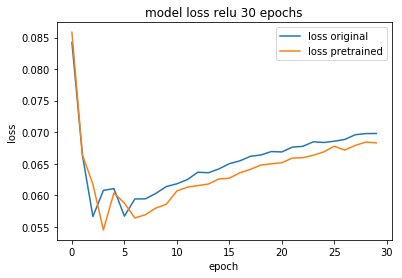

In [28]:
plt.plot(histog.history['val_loss'])
plt.plot(histft.history['val_loss'])
plt.title('model loss relu 30 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss original', 'loss pretrained'], loc='upper right')
plt.show()


Las dos redes partieron relativamente iguales para luego overfittear y el error empezar a diverger, a pesar de que la red preentrenada diverga mas rapido, es poco probable que se deba a la inicializacion, ya que eso solo tiene efecto al principio del entrenamiento.

Este mismo comportamiento se vio para distintas combinaciones de optimizadores tanto en los AE como en las propias redes.